In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import os

In [5]:
dfTrain = pd.read_csv('TMNIST_Data.csv')
dfTrain = dfTrain.iloc[:,1:]

dfTrain.head()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = dfTrain[dfTrain.columns[0]].values.flatten()
y

array([2, 8, 4, ..., 0, 1, 6])

In [8]:
x = dfTrain.drop(['labels'], axis = 1).values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_dev, y_train, y_dev = train_test_split(x,y,random_state=42)

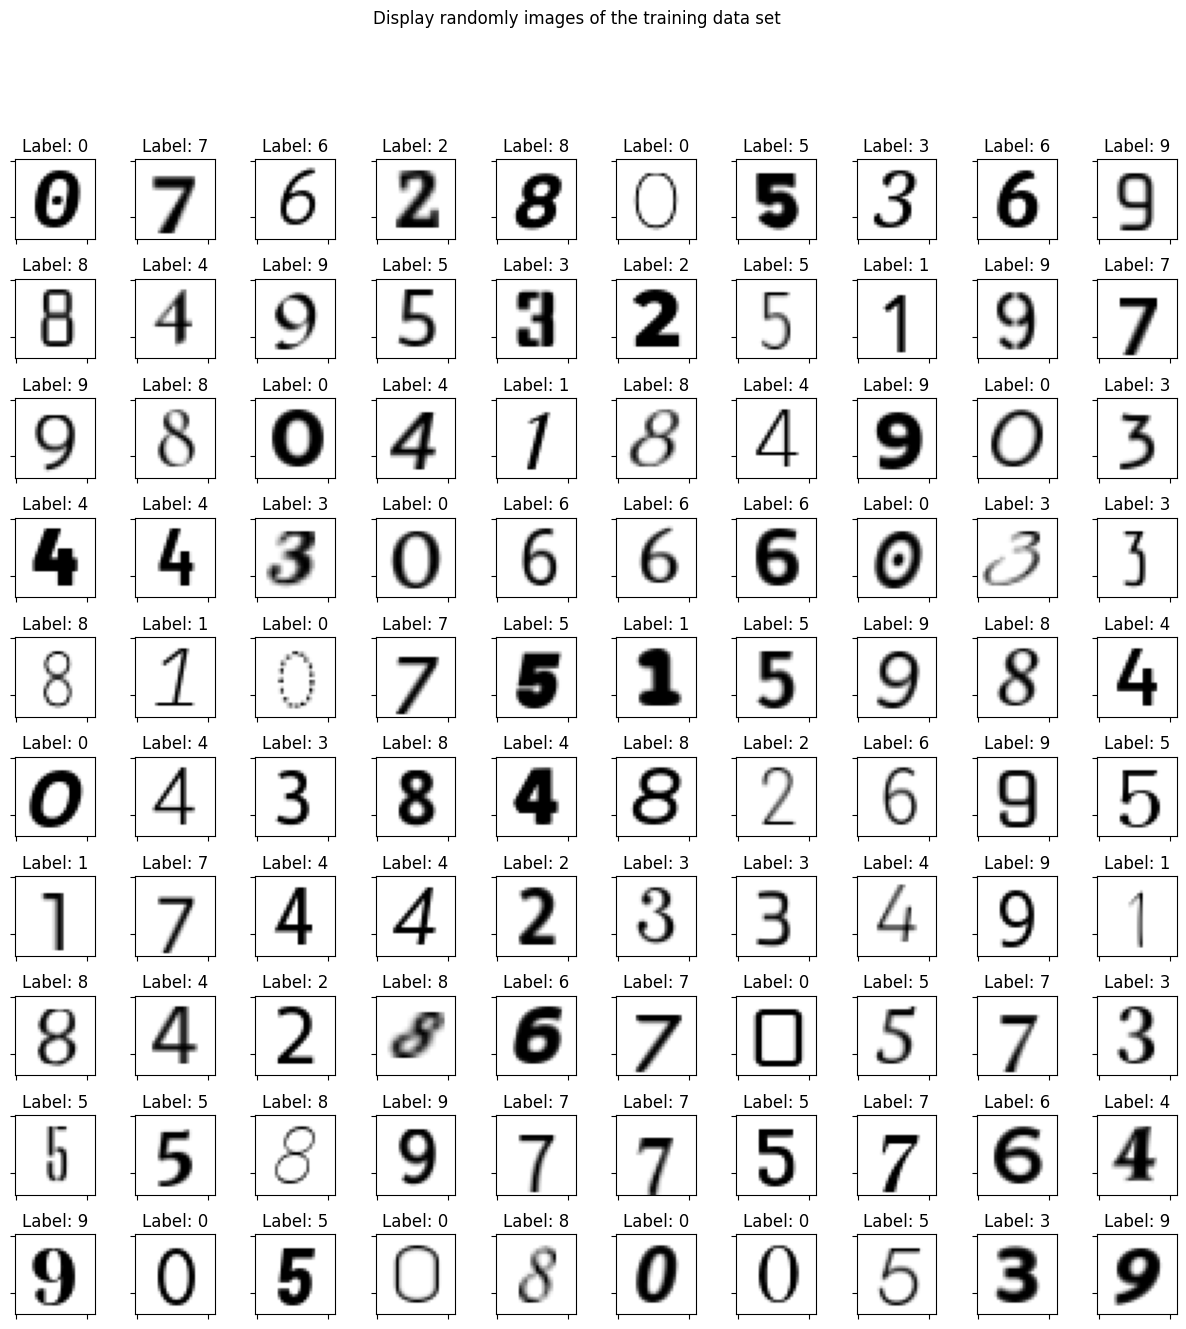

In [10]:
def displayData(X,Y):
    fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize = (15,15))
    fig.suptitle( "Display randomly images of the training data set")
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(28,28)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray_r')
            plt.setp(ax[i,j].get_xticklabels(), visible = False)
            plt.setp(ax[i,j].get_yticklabels(), visible = False)
    fig.subplots_adjust(hspace=0.5, wspace= 0.5)
displayData(x_train, y_train)


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(solver='adam', hidden_layer_sizes=(500,), alpha=0.2, early_stopping=True)
best_model = clf.fit(x/255.0, y)

In [25]:
import pickle

pickle.dump(best_model, open('typeface_model.pkl', 'wb'))

In [14]:
dfTrain['label_predicted'] = best_model.predict(x/255.0)
dfTrain['valid_predicted'] = dfTrain.apply(lambda row: row['label_predicted']==row['labels'], axis=1)

In [15]:
print('Training Accuracy: {:3.2f} %'.format(best_model.score(x,y)*100))
y_test_pred = best_model.predict(x)

Training Accuracy: 99.87 %


Text(0.5, 80.7222222222222, 'predicted label')

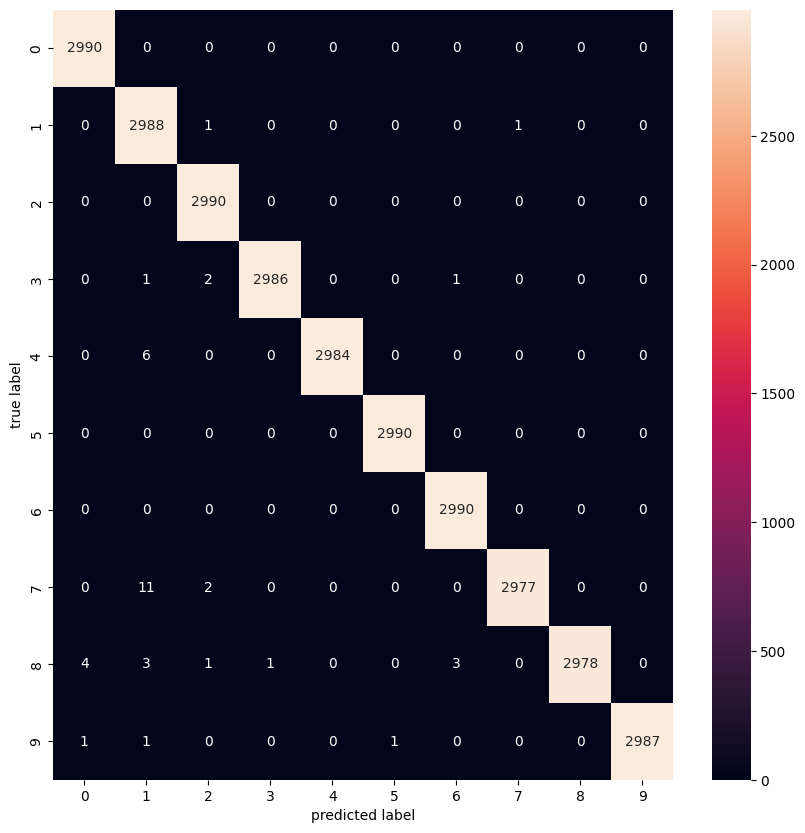

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
confusion_matrix = confusion_matrix(y, y_test_pred)
fig, ax = plt.subplots(figsize=(10,10))

sn.heatmap(confusion_matrix, annot=True, ax=ax, fmt='g',vmin=0)
ax.set_ylabel("true label")
ax.set_xlabel("predicted label")

In [17]:
from PIL import Image, ImageOps
from numpy import asarray

def image_resizing(filename):
    image = Image.open(filename)
    new_image = image.resize((28,28))
    inverted_image = ImageOps.invert(new_image)

    pixels = asarray(inverted_image)

    result_arr = []

    for i in pixels:
        for j in i:
            result_arr.append(int(np.sum(j)/3))

    return result_arr

Testing if the above function works with a test image and our model can be loaded from a pickle file.

In [18]:
data = [image_resizing('five.jpg')]
df = pd.DataFrame(data)
loaded_model = pickle.load(open('best_model.pkl','rb'))
loaded_model.predict(df)

array([5])